## POD/PCA dimensionality reduction

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/ACSE-9')

In [3]:
# #ensuring the script runs correctly + in the correct %dirs
# !python vtktools.py

In [4]:
# Imports
from numpy import *
from math  import *
import sys, os
import numpy as np
!pip install vtk -q
import vtk
import vtktools
import matplotlib.pyplot as plt
import datetime, time

import pprint as pprint

     |████████████████████████████████| 59.5 MB 45 kB/s 
     |████████████████████████████████| 3.1 MB 41.9 MB/s 
     |████████████████████████████████| 495 kB 39.3 MB/s 
     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 3.2 MB 29.0 MB/s 
     |████████████████████████████████| 251 kB 57.8 MB/s 
     |████████████████████████████████| 1.3 MB 65.1 MB/s 
     |████████████████████████████████| 294 kB 49.7 MB/s 
     |████████████████████████████████| 142 kB 43.8 MB/s 


In [5]:
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import joblib

# Find the number of components to reduce to for PCA
Principle Component Analysis extracts the components which are representitive of the variance of the data e.g. for $p_1, p_2, ... p_n$, $p_1$ represents the largest fraction of the variance and $p_n$ represents the smallest fraction of the variance for some integer $n$.

Below we want approximately 95% of the explained variance to be represented by the principle components. 

First plot the find the explained variance distribution for all the data. We cannot set $p_{tot} = 1.0$ so it is set to $p_{tot} = 0.999995$.

In [6]:
# Load matrix
all_values = joblib.load('/content/gdrive/MyDrive/ACSE-9/output_pod_files/snapshot_matrix_410.pkl') 

In [7]:
all_values.shape

(410, 595624)

In [8]:
from sklearn.decomposition import PCA

# p_tot -> proportion of the variance we want to keep
# p = 0.999
p_tot = 0.9999999999999995
# # Create an instance of the PCA model
pca = PCA(p_tot)
train_pca = pca.fit_transform(all_values)
# In this case np.allclose == True because we are not yet
# reducing the dimensionality
X_recovered = pca.inverse_transform(train_pca)
np.allclose(X_recovered, all_values)

True

In [9]:
all_values

array([[ 1.        ,  1.        ,  1.        , ...,  0.58938422,
        -0.10946988, -0.10174592],
       [ 0.97360818,  0.98210026,  0.96064208, ..., -0.50187646,
         0.89386907,  1.        ],
       [ 0.63525847, -0.1372478 , -0.38702153, ..., -0.45218777,
         0.57175512,  0.62440241],
       ...,
       [-0.99976513, -0.99991271, -0.99938171, ...,  0.70392922,
        -0.12285544, -0.12074436],
       [-0.99974408, -0.99990316, -0.9993286 , ...,  0.54013904,
        -0.24523432, -0.23086515],
       [-0.99972373, -0.99989336, -0.9992791 , ...,  0.53738397,
        -0.2578244 , -0.23995282]])

In [10]:
# Number of components the pca results in is for almost 1.0 variance -> close to 410 as expected
pca.n_components_

406

In [11]:
pca.explained_variance_ratio_

array([4.44040536e-01, 2.61350888e-01, 7.23348210e-02, 5.15312869e-02,
       2.48136813e-02, 2.19407679e-02, 1.70255227e-02, 1.60464720e-02,
       1.24974096e-02, 9.64975122e-03, 8.65102916e-03, 7.63786572e-03,
       5.97313186e-03, 5.10202901e-03, 4.54165754e-03, 3.76920094e-03,
       3.42443003e-03, 2.72829593e-03, 2.48936026e-03, 2.10497820e-03,
       1.92849736e-03, 1.57422066e-03, 1.46853054e-03, 1.41979190e-03,
       1.17485448e-03, 1.00561862e-03, 9.23344685e-04, 8.69774000e-04,
       7.90402157e-04, 7.71331429e-04, 6.65152415e-04, 6.02844597e-04,
       5.59414355e-04, 5.44720443e-04, 4.96222787e-04, 4.61973844e-04,
       4.20163668e-04, 3.94081287e-04, 3.51598693e-04, 3.13912454e-04,
       3.00027284e-04, 2.84448215e-04, 2.61627791e-04, 2.55533537e-04,
       2.36558488e-04, 2.12251440e-04, 2.03223016e-04, 1.91798921e-04,
       1.72647958e-04, 1.62267246e-04, 1.57028106e-04, 1.44917988e-04,
       1.39180740e-04, 1.29547632e-04, 1.20098712e-04, 1.14404155e-04,
      

In [12]:
pca.singular_values_

array([3.83878899e+03, 2.94506525e+03, 1.54937533e+03, 1.30773102e+03,
       9.07462173e+02, 8.53313944e+02, 7.51680283e+02, 7.29747662e+02,
       6.44010477e+02, 5.65901688e+02, 5.35817408e+02, 5.03464601e+02,
       4.45229551e+02, 4.11485365e+02, 3.88230921e+02, 3.53677618e+02,
       3.37114226e+02, 3.00904490e+02, 2.87426500e+02, 2.64305824e+02,
       2.52983651e+02, 2.28568161e+02, 2.20762052e+02, 2.17067737e+02,
       1.97458108e+02, 1.82683610e+02, 1.75051106e+02, 1.69897169e+02,
       1.61959710e+02, 1.59993907e+02, 1.48574240e+02, 1.41444354e+02,
       1.36254149e+02, 1.34452774e+02, 1.28327958e+02, 1.23820235e+02,
       1.18084305e+02, 1.14360445e+02, 1.08020593e+02, 1.02067436e+02,
       9.97845508e+01, 9.71593359e+01, 9.31804639e+01, 9.20888149e+01,
       8.86037695e+01, 8.39282667e+01, 8.21238644e+01, 7.97822006e+01,
       7.56943832e+01, 7.33834902e+01, 7.21891001e+01, 6.93496190e+01,
       6.79629940e+01, 6.55688657e+01, 6.31323719e+01, 6.16174655e+01,
      

In [13]:
# shape is the same as before
train_pca.shape

(410, 406)

In [14]:
# Find the cumulative sum of the explained variance ratio to plot
p = 0.995
cumsum_eig = np.cumsum(pca.explained_variance_ratio_)
d_tot = pca.n_components_
# Find the number of principle components 
d = np.argmax(cumsum_eig >= p) + 1
print("initial number of components = ", d_tot)
print("number of components after PCA = ", d)

initial number of components =  406
number of components after PCA =  43


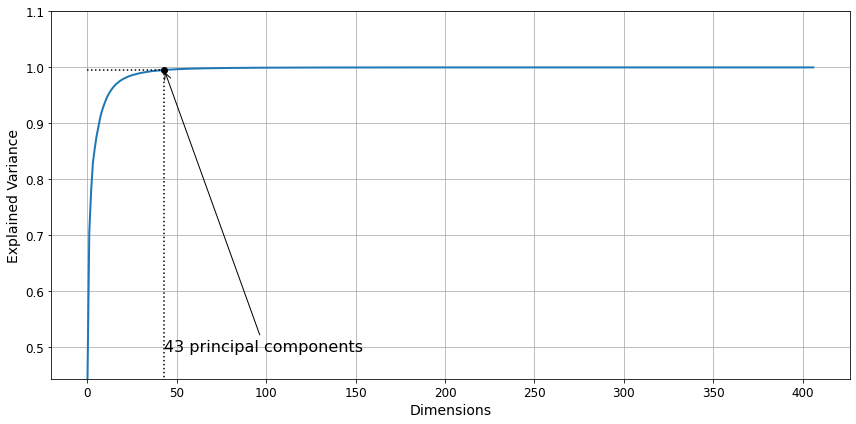

In [15]:
x_dims = np.linspace(0, d_tot, d_tot)
plt.figure(figsize=(12,6))
plt.plot(x_dims, cumsum_eig, linewidth=2)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.ylim([cumsum_eig[0],1.1])
plt.plot([d, d], [0, p], "k:")
plt.plot([0, d], [p, p], "k:")
plt.plot(d, p, "ko")
plt.annotate("43 principal components", xy=(d, p), xytext=(d, cumsum_eig[0]+0.05),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

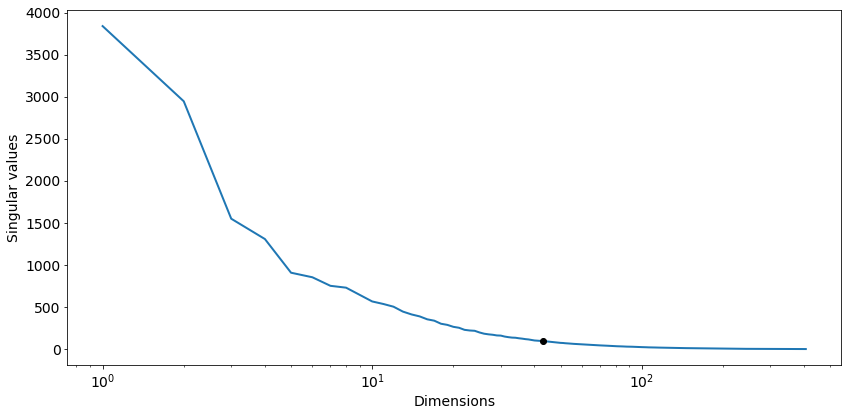

In [16]:
# Plot   
mpl.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
mpl.rc('axes', labelsize=14)

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(range(1,len(pca.singular_values_)+1), pca.singular_values_, linewidth=2)
ax.set_xlabel("Dimensions")
ax.set_ylabel("Singular values")
ax.set_xscale('log')
#ax.set_yscale('log') 
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#plt.yscale('log') 
ax.plot(d, pca.singular_values_[d-1], "ko")
# ax.annotate("16 principal components", xy=(d, pca.singular_values_[d-1]), xytext=(d+2, 1e5),
#              arrowprops=dict(arrowstyle="->"), fontsize=22)
ax.grid()
#ax.grid(True, which="both", ls="-", color='0.65')
plt.tight_layout()
#plt.savefig('PCA_sv1.eps')

ax.grid()
#ax.grid(True, which="both", ls="-", color='0.65')
plt.tight_layout()

# Apply PCA to the Data

Bring the number of components down to 43 as shown previously to represent 99.55% of the data. In this case `np.allclose(X_recovered, all_values) == False` since we are reducing the dimensionality of the data.

In [17]:
pca_compress = PCA(n_components=d)
X_train_pca = pca_compress.fit_transform(all_values)
X_recovered = pca_compress.inverse_transform(X_train_pca)
print(np.allclose(X_recovered, all_values))
X_train_pca.shape

False


(410, 43)

In [21]:
print(all_values, "\n\n")
print(X_train_pca)

[[ 1.          1.          1.         ...  0.58938422 -0.10946988
  -0.10174592]
 [ 0.97360818  0.98210026  0.96064208 ... -0.50187646  0.89386907
   1.        ]
 [ 0.63525847 -0.1372478  -0.38702153 ... -0.45218777  0.57175512
   0.62440241]
 ...
 [-0.99976513 -0.99991271 -0.99938171 ...  0.70392922 -0.12285544
  -0.12074436]
 [-0.99974408 -0.99990316 -0.9993286  ...  0.54013904 -0.24523432
  -0.23086515]
 [-0.99972373 -0.99989336 -0.9992791  ...  0.53738397 -0.2578244
  -0.23995282]] 


[[ 3.37709998e+02  2.06305823e+01  1.88619242e+02 ... -1.38177589e-01
  -1.45124088e-01  4.50370459e-01]
 [ 3.00713410e+02  4.39191655e+02  2.17048304e+02 ... -4.54497362e+00
   1.22846084e+00 -2.60247622e+00]
 [ 2.99835931e+02  4.75150556e+02  2.02440047e+02 ...  1.74492493e+01
   2.87066437e+00  1.78825705e+00]
 ...
 [-3.01195307e+02 -5.04439826e+01  1.34206710e+02 ... -1.41454525e+00
   4.10086381e+00 -2.15422833e+00]
 [-3.02063245e+02 -7.05102756e+01  1.38604791e+02 ... -4.89843560e+00
   2.125632

In [18]:
pca_compress.singular_values_

array([3838.78898894, 2945.06525071, 1549.37533095, 1307.73101925,
        907.46217335,  853.31394419,  751.68028291,  729.74766159,
        644.01047653,  565.90168833,  535.81740789,  503.46460143,
        445.22955134,  411.48536452,  388.2309215 ,  353.67761786,
        337.11422598,  300.90449032,  287.42650047,  264.30582362,
        252.98365053,  228.56816137,  220.76205197,  217.06773693,
        197.45810736,  182.6836093 ,  175.05110289,  169.89716748,
        161.95970484,  159.99385494,  148.57419838,  141.44431839,
        136.25404161,  134.45267354,  128.32767238,  123.81944395,
        118.08353395,  114.35964285,  108.0128403 ,  102.05794806,
         99.75950346,   97.15299352,   93.1320086 ])

### Test for Transformations 
Check to see if undoing the transformations results in negative values or anomolies. This test does not work in this file! Move this test or import `loadvtufile()` 

In [ ]:
def loadvtufile(path, name_simu, fieldname, vtu_start, vtu_end, vtu_step):
    """
    Read in .vtu files for a particular field
    
    Parameters
    ----------
    path : str 
        path to the folder containing the .vtu files
    name_simu : str
        name of the simulation data
    field_name : str
        field to read in e.g. CO2_ppm 
    vtu_start : int
        file number to start reading from  
    vtu_end : int
        file number to read up to
    vtu_step : int
        how many files to step across
    Returns
    -------
    numpy.ndarray 
        Returns the data from a particular field 
    """
    tic = time.time()
    
    extension = '.vtu'
    
    all_data = []

    #---------------------------------------------------------------------
    # EXTRACT DATA
    #---------------------------------------------------------------------
    for vtuID in range(vtu_start,vtu_end + 1,vtu_step):
        filename=path+name_simu+'_'+str(vtuID)+extension
        print ('\n  '+str(filename))

        vtu_data = vtktools.vtu(filename)
        data     = vtu_data.GetField(fieldname)
        #print (data)
        all_data.append(data)


    toc = time.time() #added 
    print ('\n\nTime : ', toc - tic, 'sec')
    return np.array(all_data)
    #pprint.pprint(data)

In [ ]:
#--------------------------------#
#-- Choose variables           --#
#--------------------------------#
# Vtu files
# path      = '../ClarenceCentre/run_Clip_ToSend/'
path = '/content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/'
name_simu = 'ClarenceCentre'
vtu_step  = 1

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# CO2data_sub = loadvtufile(path, name_simu, 'CO2_ppm', 0, 10, vtu_step)

# nfiles_sub = CO2data_sub.shape[0]
# nNodes_sub = CO2data_sub.shape[1]
# CO2_data_sub = CO2data_sub.reshape((nfiles_sub, nNodes_sub))
# print("CO2_data_sub.shape", CO2_data_sub.shape)

# scaler_std_sub = MinMaxScaler((-1, 1))

# scaler_std_sub.fit(CO2_data_sub)

# # Apply transform to both the training set and the test set.
# norm_co2_sub = scaler_std_sub.transform(CO2_data_sub)
# print("norm_co2_sub.shape", norm_co2_sub.shape)

# all_data_sub = []
# for i in range(nfiles_sub):
#     all_data_sub.append(norm_co2_sub[i].reshape(-1, 1))
# alldata_sub = np.array(all_data_sub)

# # Check the shape of the array
# print("initial shape", alldata_sub.shape)
# # reshape st it takes the appropriate form
# all_values_sub = np.array(alldata_sub).reshape(nfiles_sub, nNodes_sub)
# print("Snapshot Matrix Shape", all_values_sub.shape)

### Steps:
- Apply PCA and reduce to 6 components 
- Undo PCA to obtain a scaled snapshot matrix
- Undo $(-1, 1)$ scaling

In [ ]:
# from sklearn.decomposition import PCA

# pca_compress_sub = PCA(n_components=6, whiten=False)
# X_train_pca_sub = pca_compress_sub.fit_transform(all_values_sub)
# X_recovered_sub = pca_compress_sub.inverse_transform(X_train_pca_sub)
# print(np.allclose(X_recovered_sub, all_values_sub))
# # number of time levels x number of components 
# print("X_train_pca_sub.shape", X_train_pca_sub.shape)

# ### Inverse Transform
# S_gen = scaler_std_sub.inverse_transform(X_recovered_sub)
# print("max value of generated S_sub = ", np.max(S_gen))
# print("max value of real S_sub = ", np.max(CO2_data_sub))
# print("min value of generated S_sub = ", np.min(S_gen))
# print("min value of real S_sub = ", np.min(CO2_data_sub))

# Output the PCA/POD coefficients to a `.csv` file 

In [19]:
X_train_pca.max()

475.150556044023

In [ ]:
import joblib
joblib.dump(X_train_pca, '/content/gdrive/MyDrive/ACSE-9/output_pod_files/pod_coefficients_410.pkl') 
joblib.dump(all_values, '/content/gdrive/MyDrive/ACSE-9/output_pod_files/X_train_1D_410.pkl')
joblib.dump(pca_compress, '/content/gdrive/MyDrive/ACSE-9/output_pod_files/pca_compress_410.pkl')

['/content/gdrive/MyDrive/ACSE-9/output_pod_files/pca_compress_410.pkl']

In [ ]:
# # optimisation of test of file saving & reading test
# test1 = np.loadtxt('/content/gdrive/MyDrive/ACSE-9/output_pod_files/X_train_1D_full.csv', delimiter=',')
# test2 = joblib.load('/content/gdrive/MyDrive/ACSE-9/output_pod_files/X_train_1D_full_test.pkl')

# print(np.allclose(test1, test2))